# 10 minutes to pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [27]:
from IPython.display import Image
import numpy as np
import pandas as pd

# **Basic data structures in pandas**
Pandas provides two types of classes for handling data:

**Series**: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

**DataFrame**: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns:

In [6]:
dates = pd.date_range("20250101",periods=6)
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2025-01-01,-0.349151,1.203714,-1.323920,-1.094342
2025-01-02,-1.323479,0.066276,-1.606358,0.032373
2025-01-03,0.797690,0.969113,-0.872959,-0.041768
2025-01-04,1.139521,0.269073,-0.255462,0.916014
2025-01-05,-0.257436,1.700944,0.326519,0.749025
2025-01-06,0.539452,-1.222135,0.281613,-0.206685


Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[s]

## **Viewing data**
### Use DataFrame.head() and DataFrame.tail().
to view the top and bottom rows of the frame respectively:

In [13]:
df

,A,B,C,D
2025-01-01,-0.349151,1.203714,-1.323920,-1.094342
2025-01-02,-1.323479,0.066276,-1.606358,0.032373
2025-01-03,0.797690,0.969113,-0.872959,-0.041768
2025-01-04,1.139521,0.269073,-0.255462,0.916014
2025-01-05,-0.257436,1.700944,0.326519,0.749025
2025-01-06,0.539452,-1.222135,0.281613,-0.206685


### Display the DataFrame.index or DataFrame.columns:

In [18]:
print("The index of the dataFrame is: \n {}".format(df.index))

The index of the dataFrame is: 
 DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06'],
              dtype='datetime64[ns]', freq='D')


In [19]:
print("The columns of the dataFrame is: \n {}".format(df.columns))

The columns of the dataFrame is: 
 Index(['A', 'B', 'C', 'D'], dtype='object')


### Return a NumPy representation
of the underlying data with DataFrame.to_numpy() without the index or column labels:

In [21]:
df

,A,B,C,D
2025-01-01,-0.349151,1.203714,-1.323920,-1.094342
2025-01-02,-1.323479,0.066276,-1.606358,0.032373
2025-01-03,0.797690,0.969113,-0.872959,-0.041768
2025-01-04,1.139521,0.269073,-0.255462,0.916014
2025-01-05,-0.257436,1.700944,0.326519,0.749025
2025-01-06,0.539452,-1.222135,0.281613,-0.206685


In [20]:
df.to_numpy()

array([[-0.34915123,  1.20371392, -1.32392024, -1.09434229],
       [-1.32347853,  0.06627568, -1.60635849,  0.03237315],
       [ 0.79769023,  0.96911335, -0.87295864, -0.04176812],
       [ 1.13952052,  0.2690732 , -0.25546192,  0.91601445],
       [-0.2574356 ,  1.70094413,  0.32651949,  0.74902517],
       [ 0.5394517 , -1.22213518,  0.28161271, -0.20668508]])

**Note**:\
NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, DataFrame.to_numpy() will require copying data.

In [22]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [24]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

### **describe()** shows a quick statistic summary

In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.091100,0.497831,-0.575095,0.059103
std,0.907282,1.035829,0.819999,0.724190
min,-1.323479,-1.222135,-1.606358,-1.094342
25%,-0.326222,0.116975,-1.211180,-0.165456
50%,0.141008,0.619093,-0.564210,-0.004697
75%,0.733131,1.145064,0.147344,0.569862
max,1.139521,1.700944,0.326519,0.916014


### Transposing your data:

In [26]:
df.T

,2025-01-01,2025-01-02,2025-01-03,2025-01-04,2025-01-05,2025-01-06
A,-0.349151,-1.323479,0.797690,1.139521,-0.257436,0.539452
B,1.203714,0.066276,0.969113,0.269073,1.700944,-1.222135
C,-1.323920,-1.606358,-0.872959,-0.255462,0.326519,0.281613
D,-1.094342,0.032373,-0.041768,0.916014,0.749025,-0.206685


<img src="DataFrame_at.png" width="500" height="300">

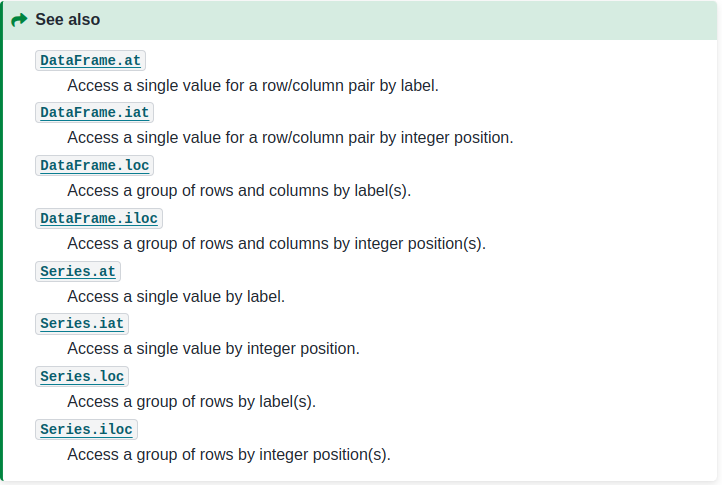

In [32]:
# To see image in IPython
Image(filename='DataFrame_at.png',width=400, height=300)